In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1: Create a random dataset of 100 rows and 30 columns with values between [1, 200]
np.random.seed(42)  # For reproducibility
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f"Col_{i+1}" for i in range(30)])

In [2]:
# 1.1 Replace all values between [10, 60] with NA (np.nan)
df_masked = df.mask((df >= 10) & (df <= 60), np.nan)

In [3]:
# Print count of NAs in each row and each column
print("Count of NAs per row:")
print(df_masked.isna().sum(axis=1))
print("\nCount of NAs per column:")
print(df_masked.isna().sum(axis=0))

Count of NAs per row:
0      7
1     11
2      8
3      9
4      8
      ..
95    10
96     9
97     9
98     7
99    10
Length: 100, dtype: int64

Count of NAs per column:
Col_1     23
Col_2     22
Col_3     21
Col_4     18
Col_5     26
Col_6     28
Col_7     23
Col_8     27
Col_9     21
Col_10    17
Col_11    26
Col_12    24
Col_13    23
Col_14    28
Col_15    23
Col_16    34
Col_17    31
Col_18    31
Col_19    34
Col_20    20
Col_21    24
Col_22    26
Col_23    23
Col_24    31
Col_25    27
Col_26    26
Col_27    31
Col_28    27
Col_29    31
Col_30    31
dtype: int64


In [4]:
# 2: Replace all NA values with the average of the column values
df_filled = df_masked.fillna(df_masked.mean())

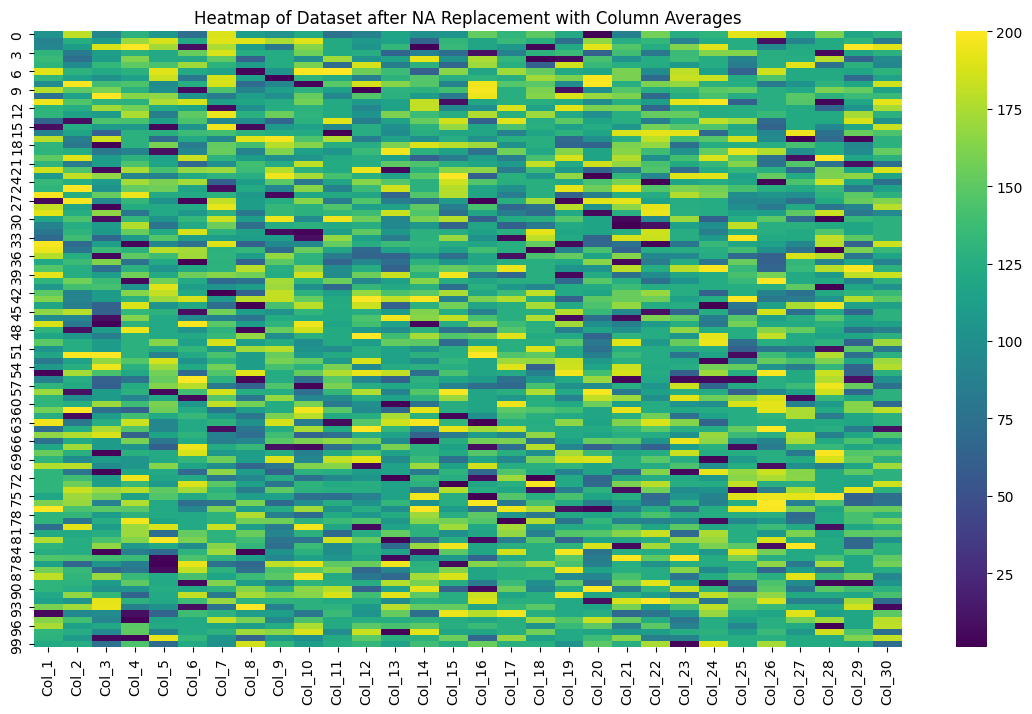

In [5]:
# 3: Plot heat map of the dataset after NA replacement
plt.figure(figsize=(14, 8))
sns.heatmap(df_filled, cmap='viridis', cbar=True)
plt.title("Heatmap of Dataset after NA Replacement with Column Averages")
plt.show()

In [6]:
# 4: Count the number of columns having correlation <= 0.7 (absolute value)
correlation_matrix = df_filled.corr().abs()
# We want to count columns based on their maximum correlation with any other column being <= 0.7
num_cols_corr_le_07 = (correlation_matrix.apply(lambda x: x.drop(x.name).max() <= 0.7)).sum()
print(f"Number of columns having max correlation <= 0.7 with any other column: {num_cols_corr_le_07}")


Number of columns having max correlation <= 0.7 with any other column: 30


In [7]:
# 5: Normalize each column in the dataset between 0 and 10
df_normalized = df_filled.copy()
for col in df_normalized.columns:
    min_val = df_normalized[col].min()
    max_val = df_normalized[col].max()
    df_normalized[col] = 10 * (df_normalized[col] - min_val) / (max_val - min_val)

print("\nSample of normalized dataset:")
print(df_normalized.head())


Sample of normalized dataset:
      Col_1     Col_2     Col_3      Col_4     Col_5     Col_6     Col_7  \
0  5.102041  8.963731  4.595960   6.385415  5.329949  3.585859  9.641026   
1  4.387755  6.085426  5.457742   8.527919  9.441624  6.064113  9.692308   
2  4.540816  5.388601  9.393939  10.000000  8.629442  0.353535  8.923077   
3  6.485555  3.886010  5.505051   6.385415  6.031006  7.727273  9.589744   
4  6.734694  3.367876  5.457742   8.121827  6.031006  6.064113  7.692308   

      Col_8     Col_9    Col_10  ...    Col_21    Col_22    Col_23    Col_24  \
0  5.514559  5.179487  6.102564  ...  4.416244  7.889447  6.161543  6.548223   
1  9.497487  8.871795  9.589744  ...  6.317125  6.582915  4.336735  6.233355   
2  5.514559  4.051282  8.256410  ...  7.360406  6.135407  8.061224  9.593909   
3  6.180905  6.233690  7.897436  ...  7.005076  4.020101  6.734694  8.223350   
4  3.065327  6.233690  4.923077  ...  5.177665  6.135407  6.785714  6.233355   

     Col_25    Col_26    Col_27

<Figure size 1000x600 with 0 Axes>

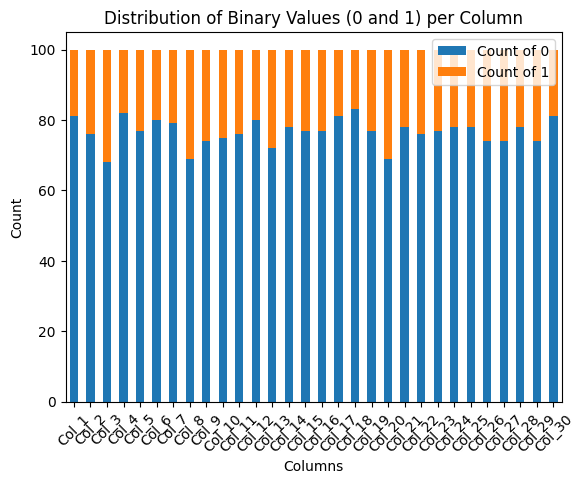

In [11]:
# 6: Replace all values with 0 if value <= 5 else with 1 (binary transformation)
# df_binary = df_normalized.applymap(lambda x: 0 if x <= 5 else 1)
df_binary = (df_normalized <= 5).astype(int)

# Visualize distribution of the binary dataset (count of 0 and 1)
value_counts = df_binary.apply(pd.Series.value_counts).fillna(0).T
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', stacked=True)
plt.title("Distribution of Binary Values (0 and 1) per Column")
plt.xlabel("Columns")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(["Count of 0", "Count of 1"])
plt.show()